In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

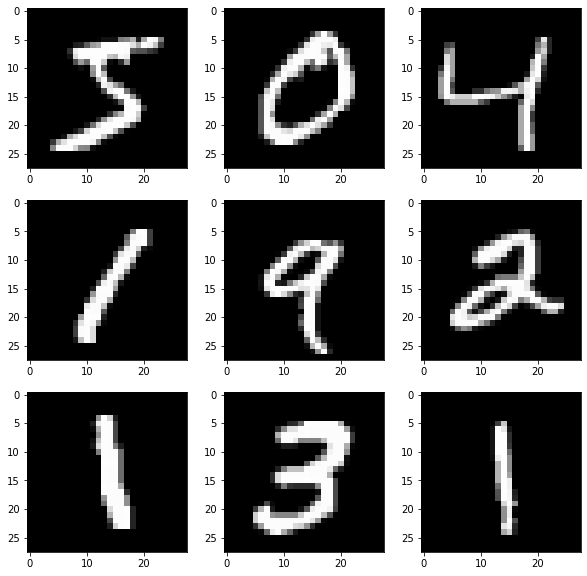

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [12]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [16]:
class_names[y_train[8]]

'9'

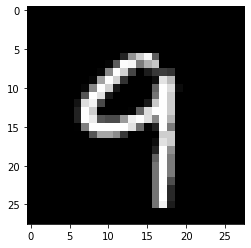

In [17]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#Sigmoid: probabilities produced by a Sigmoid are independent.
#Softmax: the outputs are interrelated. The sum of all outputs are 1.
        

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [21]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
# batch = The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# epochs = how many times to do a pass over all the dataset

# https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32) # also possible to use validation_split=0.1


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6118 - accuracy: 0.8407 - val_loss: 0.3074 - val_accuracy: 0.9140
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.9177 - val_loss: 0.2423 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2337 - accuracy: 0.9339 - val_loss: 0.2037 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1995 - accuracy: 0.9436 - val_loss: 0.1802 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1739 - accuracy: 0.9507 - val_loss: 0.1567 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1536 - accuracy: 0.9567 - val_loss: 0.1407 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1375 - accuracy: 0.9609 - val_loss: 0.1325 - val_accuracy:

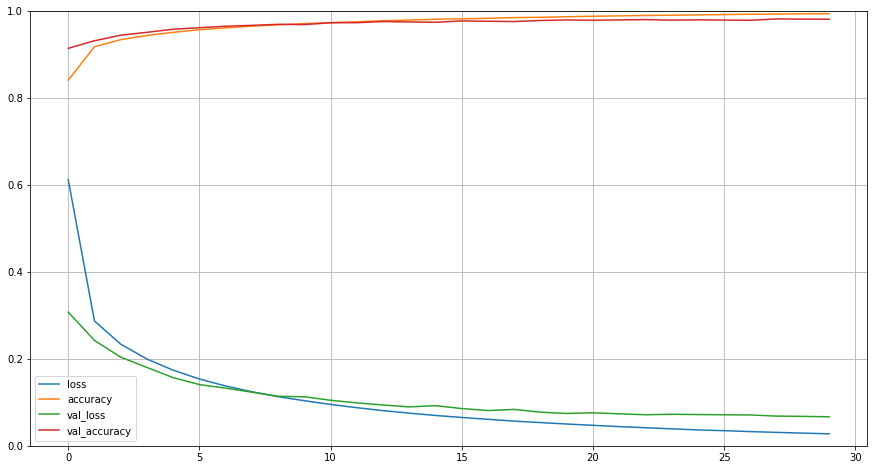

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9787


[0.07309349626302719, 0.9786999821662903]

In [26]:
model.predict(X_test)

array([[2.8751465e-06, 2.0754129e-07, 6.1676292e-05, ..., 9.9950814e-01,
        9.8630449e-07, 1.6830434e-05],
       [1.1520077e-06, 7.2979063e-05, 9.9987054e-01, ..., 2.2900718e-11,
        3.3291511e-05, 1.0812968e-12],
       [4.4332783e-06, 9.9486524e-01, 2.0488337e-04, ..., 2.2194909e-03,
        1.1720587e-03, 1.8064477e-05],
       ...,
       [3.2476799e-11, 2.0790751e-10, 5.9037747e-10, ..., 1.7119794e-06,
        2.3195342e-07, 3.4683508e-06],
       [8.3430777e-08, 9.9309581e-08, 2.4255058e-09, ..., 1.8355777e-09,
        1.5127756e-04, 1.5452331e-10],
       [6.3835398e-07, 5.1208793e-10, 2.2149187e-07, ..., 9.7214511e-13,
        5.5125906e-08, 7.6902289e-09]], dtype=float32)

In [27]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

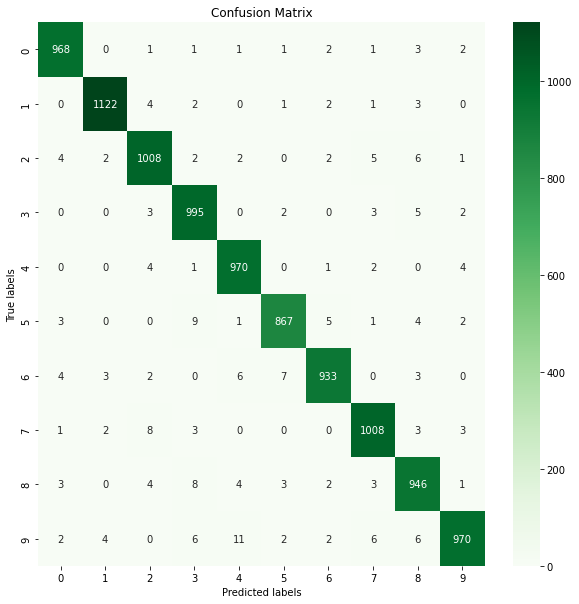

In [29]:
import seaborn as sb    

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()